## Running a k-means Cluster Analysis

This week’s assignment involves running a k-means cluster analysis. Cluster analysis is an unsupervised machine learning method that partitions the observations in a data set into a smaller set of clusters where each observation belongs to only one cluster. The goal of cluster analysis is to group, or
cluster, observations into subsets based on their similarity of responses on multiple variables. Clustering  variables should be primarily quantitative variables, but binary variables may also be included.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| incomeperperson|	2010 Gross Domestic Product per capita in constant 2000 US$.|
| alcconsumption|	2008 alcohol consumption per adult (age 15+), litres|
| armedforcesrate|	Armed forces personnel (% of total labor force)|
| breastcancerper100TH|	2002 breast cancer new cases per 100,000 female|
| co2emissions|	2006 cumulative CO2 emission (metric tons)|
| femaleemployrate|	2007 female employees age 15+ (% of population)|
| employrate|	2007 total employees age 15+ (% of population)|
| HIVrate|	2009 estimated HIV Prevalence %|
| Internetuserate|	2010 Internet users (per 100 people)|
| lifeexpectancy|	2011 life expectancy at birth (years)|
| oilperperson|	2010 oil Consumption per capita (tonnes per year and person)|
| polityscore|	2009 Democracy score (Polity)|
| relectricperperson|	2008 residential electricity consumption, per person (kWh)|
| suicideper100TH|	2005 Suicide, age adjusted, per 100 000|
| urbanrate|	2008 urban population (% of total)|

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA
#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("gapminderfinal5.csv")

In [3]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449


In [4]:
df.shape

(213, 20)

In [5]:
X = df.iloc[:,0:15]

In [6]:
X.values

array([[8740.97,    0.03,    0.57, ...,    7.  ,   55.7 ,   24.04],
       [1915.  ,    7.29,    1.02, ...,    8.  ,   51.4 ,   46.72],
       [2231.99,    0.69,    2.31, ...,    5.  ,   50.5 ,   65.22],
       ...,
       [ 610.36,    0.2 ,    2.32, ...,    6.  ,   39.  ,   30.64],
       [ 432.23,    3.56,    0.34, ...,   12.  ,   61.  ,   35.42],
       [ 320.77,    4.96,    1.03, ...,   14.  ,   66.8 ,   37.34]])

## Standardize all values

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 0.00000027, -1.45449339, -0.58391481, ..., -0.45195945,
        -0.30623699, -1.40947028],
       [-0.50806347,  0.1311584 , -0.2829456 , ..., -0.28365987,
        -0.7546502 , -0.43277055],
       [-0.48446959, -1.31034322,  0.5798328 , ..., -0.78855863,
        -0.84850412,  0.36392014],
       ...,
       [-0.60516913, -1.4173638 ,  0.58652101, ..., -0.62025904,
        -2.04774874, -1.12524549],
       [-0.61842752, -0.68350843, -0.73774351, ...,  0.38953848,
         0.24645836, -0.91939784],
       [-0.6267236 , -0.37773536, -0.27625739, ...,  0.72613766,
         0.85129477, -0.83671427]])

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

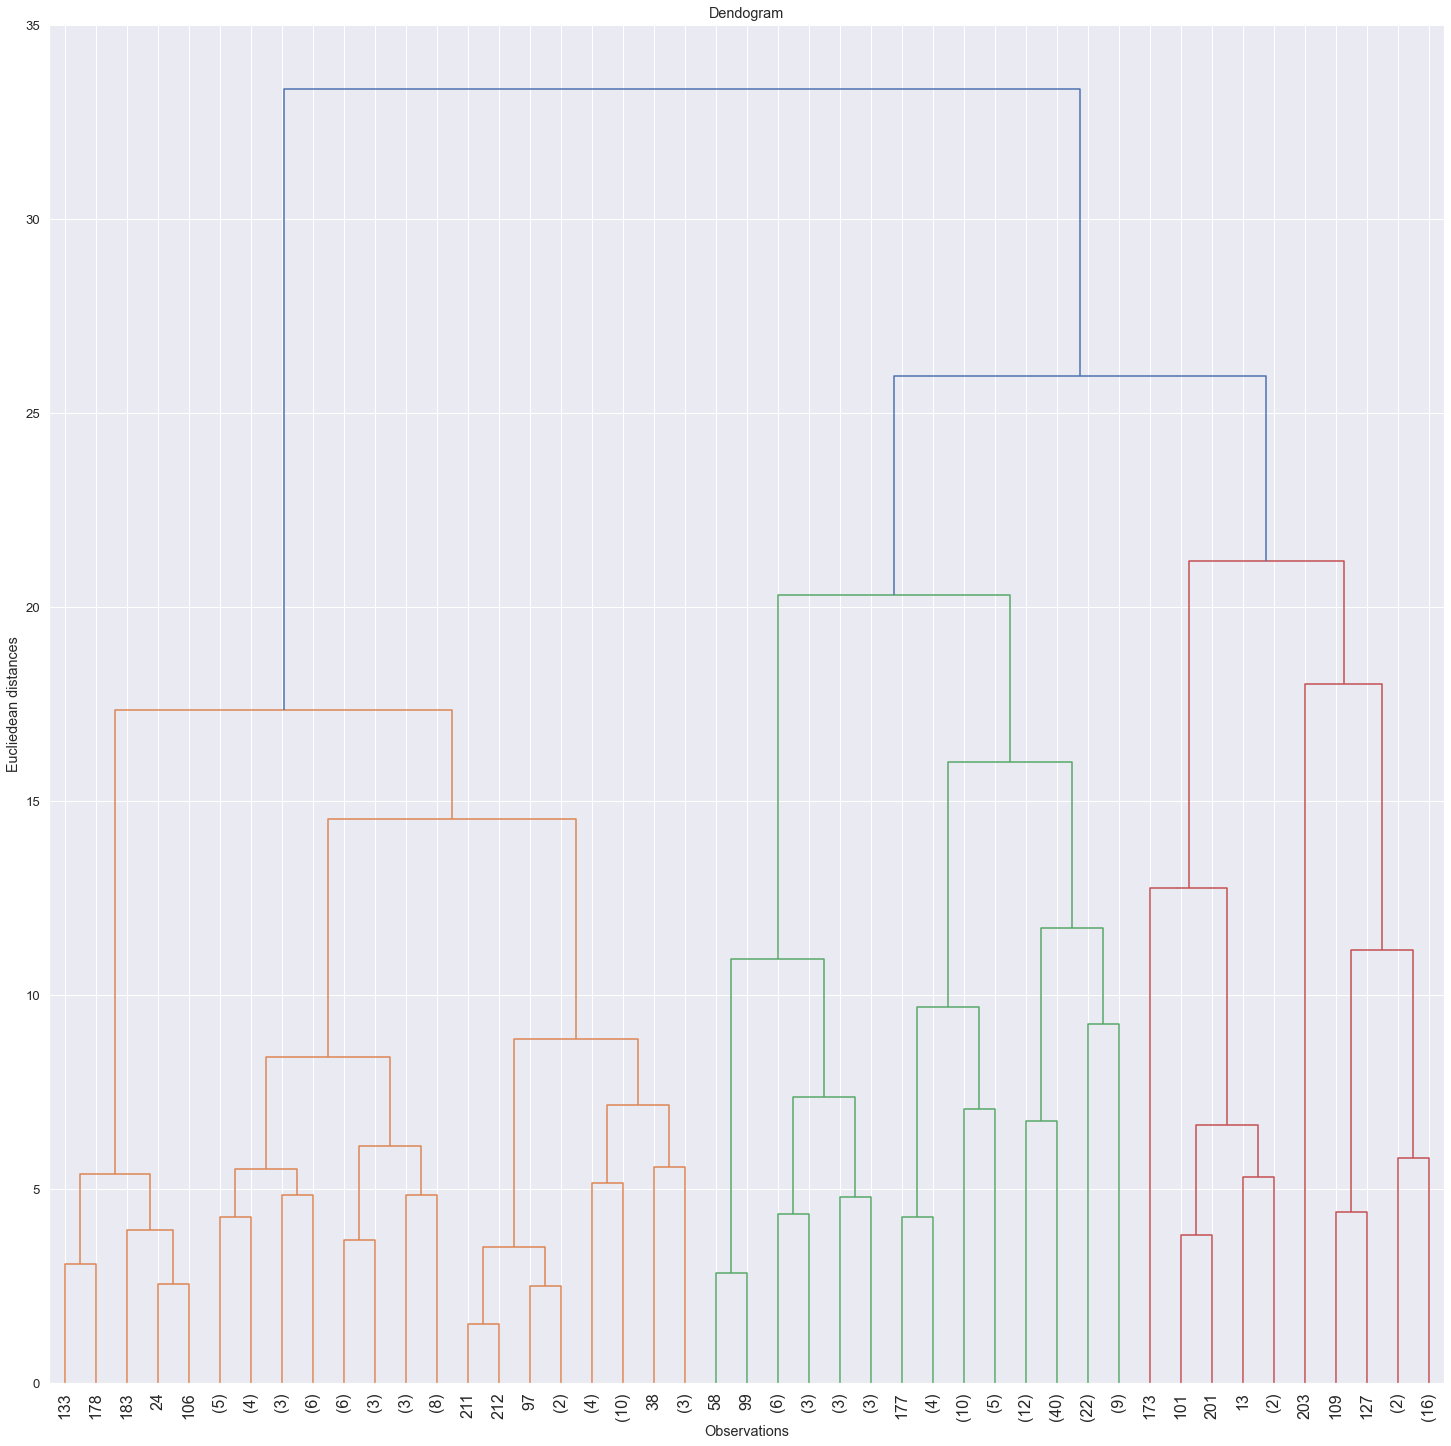

In [10]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [11]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(X_scaled)

In [13]:
y_hc

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1], dtype=int64)

In [14]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [15]:
y

,Cluster
0,1
1,2
2,2
3,2
4,1
...,...
208,1
209,2
210,2
211,1


In [16]:
y['Cluster'].unique()

array([1, 2, 0], dtype=int64)

In [17]:
y['Cluster'].value_counts()

2    120
1     66
0     27
Name: Cluster, dtype: int64

In [18]:
newdf = pd.concat([df,y],axis=1)

In [19]:
newdf

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,Cluster
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844,1
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449,2
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844,2
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449,1
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844,2
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449,2
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449,1


In [20]:
meandf = newdf.groupby(by='Cluster').mean()

In [21]:
meandf

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
Cluster,,,,,,,,,,,,,,,,,,,,
0,32696.180000,8.488519,1.257037,68.296296,23453.592593,49.296296,0.591111,76.074074,79.111111,2.607407,5.148148,3493.968148,9.777778,60.965926,80.363704,2.222222,3.370370,3.925926,2.740741,0.027593
1,1246.488788,4.345000,0.812424,21.393939,2640.378788,55.132576,4.023636,9.500000,59.166667,1.361212,1.606061,658.044545,9.803030,64.393939,35.898788,1.757576,1.348485,0.575758,1.242424,0.182582
2,7473.005917,7.574167,1.831750,39.116667,2204.741667,42.985833,1.091917,41.000000,73.466667,1.294083,4.641667,934.326083,9.600000,54.946000,62.939500,2.191667,2.050000,2.350000,2.233333,0.118371


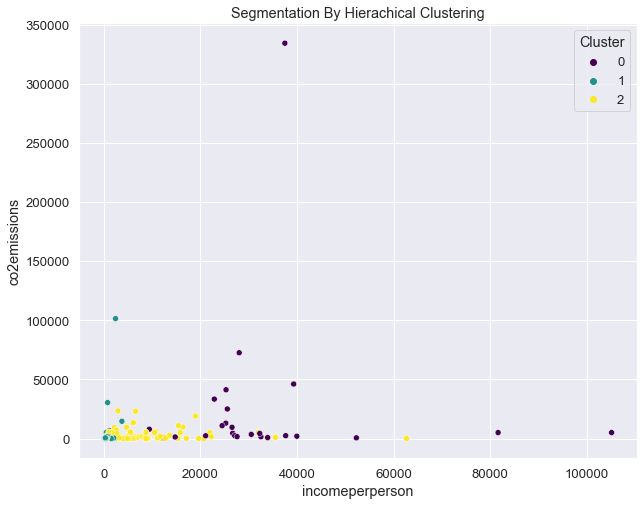

In [22]:
x_axis = newdf['incomeperperson']
y_axis = newdf['co2emissions']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation By Hierachical Clustering')
plt.show()

## K-Means Clustering

### Manual K-Means

In [23]:
#model = KMeans(n_clusters=2, random_state=0)

In [24]:
#model.fit(X_scaled)

In [25]:
# labels = model.labels_
# labels

In [26]:
# df["Labels"] = model.labels_

In [27]:
# df

In [28]:
# centroids = model.cluster_centers_
# centroids

In [29]:
# plt.figure(figsize=(10,7))

# sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")
# sns.scatterplot(x=centroids[:,0],y=centroids[:,1], s=300)
# plt.title("K-Means with 2 clusters")

# plt.show()

### Using Elbow Method

In [30]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

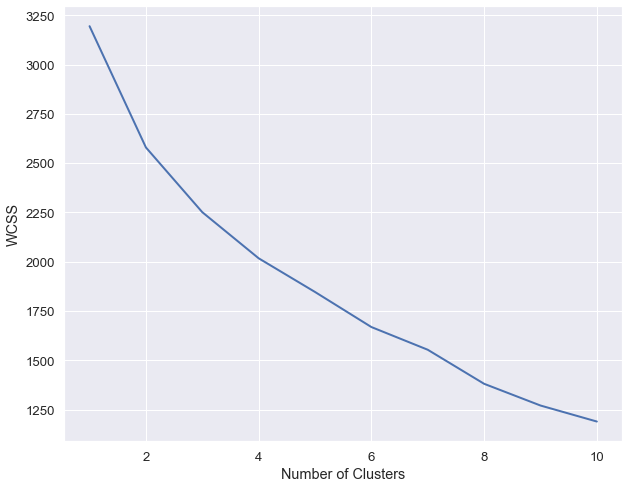

In [31]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [32]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [33]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

### Analysis Results

In [34]:
df_segm_kmeans = df.copy()

In [35]:
df_segm_kmeans

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449


In [36]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [37]:
df_segm_kmeans

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,Segment K-Means
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449,2
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844,2
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449,0
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844,2
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449,2
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449,0


In [38]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [39]:
df_segm_analysis

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
Segment K-Means,,,,,,,,,,,,,,,,,,,,
0,1379.521268,4.313380,1.003239,21.746479,2520.154930,56.011268,3.748732,9.915493,60.014085,1.349155,1.774648,652.478169,10.464789,65.059718,36.034930,1.774648,1.323944,0.661972,1.253521,0.174956
1,34259.627000,8.381333,1.383667,67.366667,20934.366667,50.545000,0.668000,76.400000,79.266667,2.418333,5.700000,3235.355000,9.800000,60.914000,82.635333,2.300000,3.133333,3.966667,2.700000,0.037446
2,6572.241161,7.742589,1.737768,39.151786,2367.133929,41.383036,1.128125,41.116071,73.375000,1.314196,4.508929,950.898304,9.160714,53.954821,62.985179,2.178571,2.125000,2.321429,2.267857,0.120132


In [40]:
df_segm_kmeans.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat', 'Segment K-Means'], dtype='object')

In [41]:
#df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means',0]].groupby(['Segment K-Means']).count()

In [42]:
#df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [43]:
#df_segm_analysis

In [44]:
# df_segm_analysis.rename({0: 'A',
#                          1: 'B',
#                          2: 'C',
#                          3: 'D'},inplace=True)

In [45]:
# df_segm_analysis

In [46]:
# df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
#                                                                   1: 'B',
#                                                                   2: 'C',
#                                                                   3: 'D'})

In [47]:
# df_segm_kmeans

### Plot the clusters

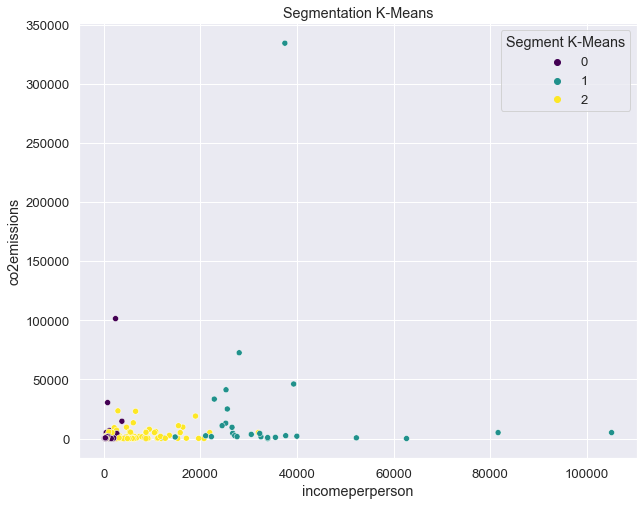

In [48]:
x_axis = df_segm_kmeans['incomeperperson']
y_axis = df_segm_kmeans['co2emissions']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_kmeans["Segment K-Means"],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()